In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import keras dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Show images

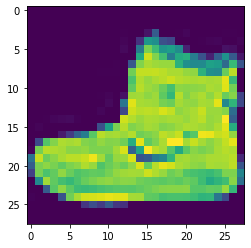

In [4]:
plt.imshow(X_train_full[0])

In [5]:
y_train_full[0]

9

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [7]:
class_names[y_train_full[0]]

'Ankle Boot'

In [8]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

# Data Normalization
We need to normalize the data dimension so that they are approcimately the same scale

In [9]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

# Split the data into train test validation dataset
In the earlier step pf importing the data, we had 60,000 dataset and test 10,000 now we further split the training data into train/validation
* Training data -- Used for trainig model
* Validation data -- Used for tunning the hyperparametres and evaluate the models
* Test data -- Used to test the model after the model has gone through initial vetting by the validation test

In [10]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

# Create the model

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential()

In [13]:
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


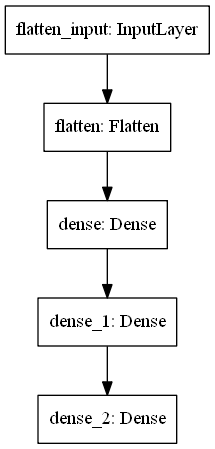

In [15]:
import pydot
keras.utils.plot_model(model)

In [16]:
weigths, biases = model.layers[1].get_weights()

In [17]:
weigths

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [18]:
weigths.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
              metrics = ["accuracy"])

In [21]:
model_history = model.fit(X_train, y_train, epochs=30,
                         validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0187 - accuracy: 0.6805 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5027 - accuracy: 0.8262 - val_loss: 0.4348 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4484 - accuracy: 0.8426 - val_loss: 0.5347 - val_accuracy: 0.7982
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4208 - accuracy: 0.8526 - val_loss: 0.3917 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4062 - accuracy: 0.8583 - val_loss: 0.3744 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8672 - val_loss: 0.3707 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3653 - accuracy: 0.8709 - val_loss: 0.3612 - val_accuracy:

In [22]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [23]:
model_history.history

{'loss': [0.7237026691436768,
  0.48419225215911865,
  0.4391198754310608,
  0.41227152943611145,
  0.39399123191833496,
  0.3752003610134125,
  0.3632165193557739,
  0.3516635298728943,
  0.3413761854171753,
  0.3319443464279175,
  0.3239230215549469,
  0.31479373574256897,
  0.3079524636268616,
  0.3021050691604614,
  0.29448434710502625,
  0.28899240493774414,
  0.2838404178619385,
  0.2777338922023773,
  0.27274635434150696,
  0.26731595396995544,
  0.2623072564601898,
  0.25757795572280884,
  0.2533426284790039,
  0.24854010343551636,
  0.24433575570583344,
  0.2404635101556778,
  0.2362230122089386,
  0.23282670974731445,
  0.2284305989742279,
  0.22501768171787262],
 'accuracy': [0.7643091082572937,
  0.831709086894989,
  0.8456000089645386,
  0.856145441532135,
  0.8619636297225952,
  0.8676727414131165,
  0.8714545369148254,
  0.8747090697288513,
  0.8790909051895142,
  0.882381796836853,
  0.8840181827545166,
  0.8865272998809814,
  0.8894000053405762,
  0.8918181657791138,
 

In [24]:
import pandas as pd 

(0.0, 1.0)

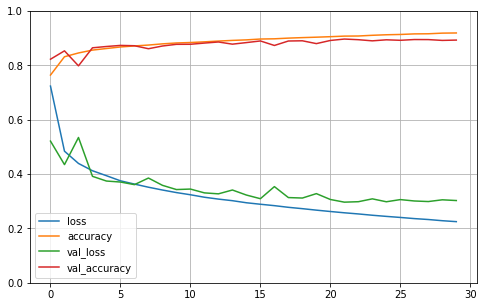

In [25]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

# Try 30 more epochs

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2204 - accuracy: 0.9201 - val_loss: 0.2893 - val_accuracy: 0.8966
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2172 - accuracy: 0.9219 - val_loss: 0.2927 - val_accuracy: 0.8966
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2135 - accuracy: 0.9224 - val_loss: 0.3754 - val_accuracy: 0.8646
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2102 - accuracy: 0.9258 - val_loss: 0.2926 - val_accuracy: 0.8984
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2082 - accuracy: 0.9249 - val_loss: 0.2789 - val_accuracy: 0.8980
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2030 - accuracy: 0.9273 - val_loss: 0.3017 - val_accuracy: 0.8910
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2004 - accuracy: 0.9293 - val_loss: 0.2922 - val_accuracy:

(0.0, 1.0)

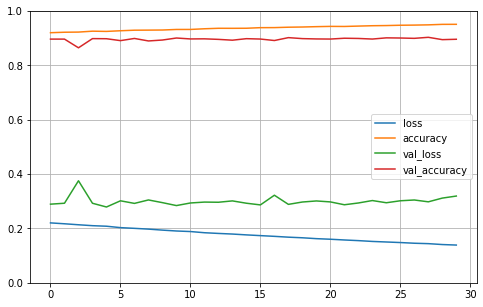

In [26]:
model_history = model.fit(X_train, y_train, epochs=30,
                         validation_data=(X_valid, y_valid))
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

# Evaluate performanse and predict values

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8884


[0.3556472957134247, 0.8884000182151794]

In [28]:
X_new = X_test[:3]

In [29]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.97, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\lucho\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [31]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

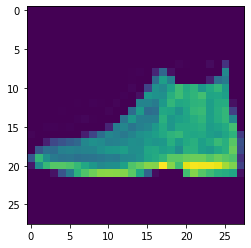

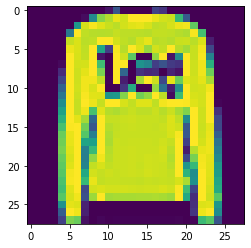

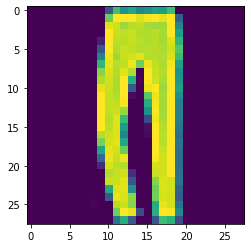

In [32]:
for X in X_new:
    plt.imshow(X)
    plt.show()